### Step 1: Modified Sample Dataset Creation

Let's assume each person makes between 1 and 3 trips a day:

1.  `person_id` (unique identifier for each person)
2.  `trip_id` (unique identifier for each trip)
3.  `income` (annual income in $1000s)
4.  `num_vehicles` (number of vehicles in the household)
5.  `activity_choice` (1 for "work", 2 for "shopping", 3 for "leisure")

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

data = {
    "person_id": [1, 1, 1, 2, 3, 3, 4],
    "trip_id": [1, 2, 3, 1, 1, 2, 1],
    "age": [25, 25, 25, 45, 35, 35, 60],
    "gender": ['M', 'M', 'M', 'F', 'F', 'F', 'M'],
    "household_type": ['Joint', 'Joint', 'Joint', 'Single', 'Single', 'Single', 'Single'],
    "house_type": ['Apartment', 'Apartment', 'Apartment', 'House', 'Apartment', 'Apartment', 'House'],
    "number_adults": [2, 2, 2, 1, 1, 1, 1],
    "num_children": [1, 1, 1, 0, 0, 0, 0],
    "num_vehicles": [2, 2, 2, 1, 1, 1, 0],
    "activity_choice": [1, 2, 3, 3, 2, 1, 3]
}

df = pd.DataFrame(data)
df.head()

,person_id,trip_id,age,gender,household_type,house_type,number_adults,num_children,num_vehicles,activity_choice
0,1,1,25,M,Joint,Apartment,2,1,2,1
1,1,2,25,M,Joint,Apartment,2,1,2,2
2,1,3,25,M,Joint,Apartment,2,1,2,3
3,2,1,45,F,Single,House,1,0,1,3
4,3,1,35,F,Single,Apartment,1,0,1,2


In [14]:
# Convert categorical variables into numeric format
label_encoders = {}
for column in ['gender', 'household_type', 'house_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,person_id,trip_id,age,gender,household_type,house_type,number_adults,num_children,num_vehicles,activity_choice
0,1,1,25,1,0,0,2,1,2,1
1,1,2,25,1,0,0,2,1,2,2
2,1,3,25,1,0,0,2,1,2,3
3,2,1,45,0,1,1,1,0,1,3
4,3,1,35,0,1,0,1,0,1,2
5,3,2,35,0,1,0,1,0,1,1
6,4,1,60,1,1,1,1,0,0,3


In [15]:

# Split data into training and test sets
X = df.drop(["person_id", "trip_id", "activity_choice"], axis=1)
y = df["activity_choice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict activity_choice for test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# If you want to visualize the decision tree, you can use libraries like graphviz.

Accuracy: 0.00


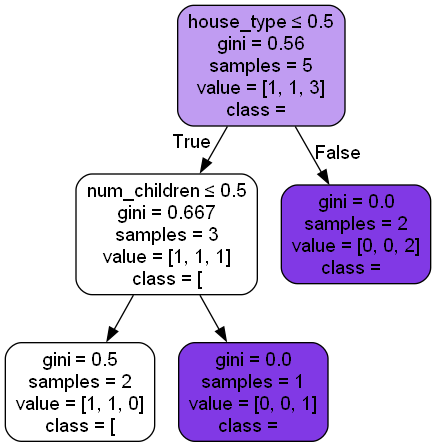

In [3]:
import graphviz
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

# Assume clf is your trained DecisionTreeClassifier

# Create a visual representation of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=str(y.unique()),  
                                filled=True, rounded=True,  
                                special_characters=True)  

from IPython.display import Image
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("tree_visualization", view=False)  # This will save a PNG file named 'tree_visualization.png'

# Display the PNG in Jupyter Notebook
Image(filename='tree_visualization.png')

In [10]:
sample_data = {
    "age": [30],
    "gender_M": [1],  # for male
    "household_type_Single": [0],  # for 'Joint'
    "house_type_House": [0],  # for 'Apartment'
    "number_adults": [2],
    "num_children": [0],
    "num_vehicles": [1]
}
sample_df = pd.DataFrame(sample_data)


In [11]:
prediction = clf.predict(sample_df)
print("Predicted activity choice:", prediction[0])


Predicted activity choice: 1


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Prepare the data (one-hot encoding, etc.)
# ... [This is the previous data preparation step]
# e.g., df_encoded = pd.get_dummies(df, columns=['gender', 'household_type', 'house_type'], drop_first=True)

# Train the RandomForest model
X = df.drop(["person_id", "trip_id", "activity_choice"], axis=1)
y = df["activity_choice"]

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X, y)

# Assume you've already defined possible_choices as before
# Dictionary of possible choices
possible_choices = {
    "work": 1,
    "shopping": 2,
    "leisure": 3
}

def generate_activity_sequence(person_attributes, rf_model, encoder, max_activities=10):
    sequence = []
    trip_id = 1
    
    # Create a base dataframe for the individual
    person_df = pd.DataFrame([person_attributes])
    
    # You may need to encode this dataframe as you did with the training data
    # person_df = encoder.transform(person_df)
    
    for _ in range(max_activities):
        # Replicate the row for each possible activity
        activity_df = person_df.loc[person_df.index.repeat(len(possible_choices))].reset_index(drop=True)
        activity_df["trip_id"] = trip_id
        
        # Predict probabilities for each activity
        predicted_probabilities = rf_model.predict_proba(activity_df)
        
        # Sum the probabilities across all classes and get the index with the highest probability
        summed_probabilities = predicted_probabilities.sum(axis=0)
        chosen_activity_index = np.argmax(summed_probabilities)
        
        chosen_activity = list(possible_choices.keys())[chosen_activity_index]
        
        sequence.append((trip_id, chosen_activity))
        
        trip_id += 1
        
        if chosen_activity == "home":
            break
        
    return sequence

# Define attributes for a new individual (matching the one-hot encoded format)
new_individual = {
    "age": 35,
    "gender_M": 0,
    "household_type_Single": 1,
    "house_type_House": 1,
    "number_adults": 2,
    "num_children": 1,
    "num_vehicles": 1
}

# Generate activity sequence
activity_sequence = generate_activity_sequence(new_individual, rf_model, None)
print(activity_sequence)


ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 8 